# 1. Introduction to Conda-OpenSim


## 1.1. Objectives

**Introduction to OpenSim**

[OpenSim](https://opensim.stanford.edu/) is an open-source software that allows users to develop, analyze, and visualize models of the musculoskeletal system, and to generate dynamic simulations of movement [[1]](https://doi.org/10.1109/TBME.2007.901024). OpenSim enables users to create custom studies, including investigating the effects of musculoskeletal geometry, joint kinematics, and muscle-tendon properties on the forces and joint moments the muscles can produce. With OpenSim, our goal is to provide a framework that allows the biomechanics community to create, share, and extend a library of models and dynamic simulation tools that can be used to study and quantify human and animal movement.

**Purpose**

The purpose of this tutorial is to introduce users to the [Conda OpenSim](https://anaconda.org/opensim-org/opensim) package, that allows the use of the library in [Jupyter notebooks](https://jupyter.org/). In this tutorial you will:

*   Learn to setup OpenSim in a Jupyter environment ([Google Colab](https://colab.research.google.com/?hl=en)).
*   Create a simple pendulum in OpenSim.
*   Visualize the position of the pendulum using [matplotlib](https://matplotlib.org/).

**Format**

This tutorial guide you through the set up of Conda OpenSim in Google Colab. Then, to test that everything is working properly, you will create a simple pendulum, simulate it, and visualize its position. As you complete each section of the tutorial, feel free to explore Conda Opensim and modify the coding blocks of the tutorial on your own.

## 1.2. Setup Conda and OpenSim

In the following cell, you will use [condacolab](https://github.com/conda-incubator/condacolab) to install [Miniconda](https://docs.conda.io/en/latest/miniconda.html). If you want to install a different conda distribution (e.g., Anaconda, Mambaforge...) check [condacolab's documentation](https://github.com/conda-incubator/condacolab#usage).

In [ ]:
!pip install -q condacolab
import condacolab
condacolab.install()

⏬ Downloading https://github.com/jaimergp/miniforge/releases/latest/download/Mambaforge-colab-Linux-x86_64.sh...
📦 Installing...
📌 Adjusting configuration...
🩹 Patching environment...
⏲ Done in 0:00:21
🔁 Restarting kernel...


Don't worry if after executing the previous cell you get an error saying that your session has failed. The reason of this is that condacolab needs to restart the session for the changes to take effect. Now, execute the following cell to install the OpenSim conda package using conda.

In [ ]:
!conda install -c opensim-org opensim

Solving environment: / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done

## Package Plan ##

  environment location: /usr/local

  added / updated specs:
    - opensim


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    ca-certificates-2022.9.24  |       ha878542_0         150 KB  conda-forge
    certifi-2022.9.24          |     pyhd8ed1ab_0         155 KB  conda-forge
    conda-22.9.0               |   py37h89c1867_1         960 KB  conda-forge
    libblas-3.9.0              |16_linux64_openblas          13 KB  conda-forge
    libcblas-3.9.0             |16_linux64_openblas          13 KB  conda-forge
    libgfortran-ng-12.1.0      |      h69a702a_16          23 KB  conda-forge
    libgfortran5-12.1.0        |      hdcd56e2_16         1.8 MB  conda-forge
    liblapack-3.9.0            |16_linux64_openblas          13 KB  conda-

## 1.3. Using OpenSim to create a pendulum

In order to test OpenSim, you are going to create a simple pendulum in the following cells. Model Factory allows you to create a single-linked pendulum. Then, after initializing the system, you will create a manager to integrate the equations of motion of the pendulum and obtain its table of states. Finally, we obtain the calculated positions and times and plot them using matplotlib.

The following cell imports the OpenSim module and if successful shows the current version and build date (**should be 4.4**).

In [ ]:
import opensim as osim
osim.GetVersionAndDate()

'version 4.4, build date 23:28:47 Jul 25 2022'

Now, let's create a simple pendulum and calculate its position over time.

In [ ]:
# Simulation parameters (Feel free to change this)
starting_time =  0.0
ending_time = 10.0

# Create the pendulum.
pendulum = osim.ModelFactory_createPendulum()

# Initialize the system and set initial time to 0.
state = pendulum.initSystem()
state.setTime(starting_time)

# Get and initialize manager with the state.
manager = osim.Manager(pendulum)
manager.initialize(state)

# Integrate the model until the ending time and get table of states.
state = manager.integrate(ending_time)
statesTable = manager.getStatesTable()

Once the simulation has finished, you can extract the times and positions from the table of states.

In [ ]:
# Extract time values for the x axis.
times = statesTable.getIndependentColumn()

# Extract positions of the pendulum over time.
positions = statesTable.getDependentColumn('/jointset/j0/q0/value')

The data resulting from the simulation can now be plotted using, for example, matplotlib. The following cell plots the position of the pendulum over time.

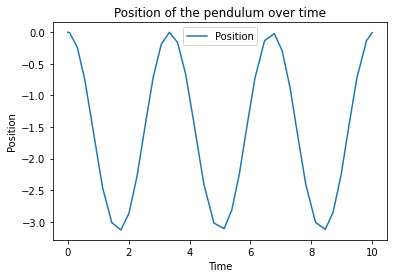

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Plot time against swinging pendulum's position.
plt.title("Position of the pendulum over time")
plt.plot(times, positions.to_numpy())
plt.legend(['Position'], loc='best')
plt.xlabel("Time")
plt.ylabel("Position");

## 1.4. Conclusion

In this tutorial you have used [condacolab](https://github.com/conda-incubator/condacolab) to install [Miniconda](https://docs.conda.io/en/latest/miniconda.html) in [Google Colab](https://colab.research.google.com/?hl=en). Then, you have installed Conda [OpenSim](https://opensim.stanford.edu/) in the Miniconda environment, and you have tested it by creating a simple pendulum and simulating it. Finally, the positions have been plotted using [matplotlib](https://matplotlib.org/).

## 1.5. Useful Links





> **OpenSim Website:** https://opensim.stanford.edu/
>
> **OpenSim API Documentation:** https://simtk.org/api_docs/opensim/api_docs/
> 
> **OpenSim Creator Website:** https://opensimcreator.com/
> 
> **SimTK Website:** https://simtk.org/projects/opensim
> 
> **Biomecanics of Movement's Course:** https://www.youtube.com/channel/UCDNGy0KKNLQ-ztcL5h2Z6zA

## 1.6. References




> [1].   Delp, S. L., Anderson, F. C., Arnold, A. S., Loan, P., Habib, A., John, C. T., Guendelman, E., & Thelen, D. G. (2007). **OpenSim: open-source software to create and analyze dynamic simulations of movement.** *IEEE Transactions on Bio-Medical Engineering*, 54(11), 1940–1950. https://doi.org/10.1109/TBME.2007.901024